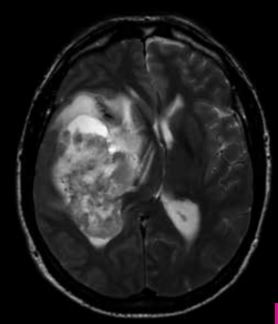

[array([0.9999974, 0.0000026], dtype=float32)]
Yes Tumor is there


In [14]:
import cv2
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np
from google.colab.patches import cv2_imshow
lst = ['Yes Tumor is there','No tumor is there']
# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = tensorflow.keras.models.load_model('trained_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# Replace this with the path to your image
image = Image.open('test_photo.jpg')
img=cv2.imread('test_photo.jpg')

#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
if len(image_array.shape) == 2: # ----------------Change here
	image_array.resize(224, 224, 1)

# display the resized image
image.show()

cv2_imshow(img)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# Load the image into the array
data[0] = normalized_image_array 

# run the inference
prediction = model.predict(data)
#print(type(prediction))
prediction = list(prediction)

print(prediction)
#print(type(prediction))

if (prediction[0][0]>prediction[0][1]):
  print(lst[0])
else:
  print(lst[1])